
[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


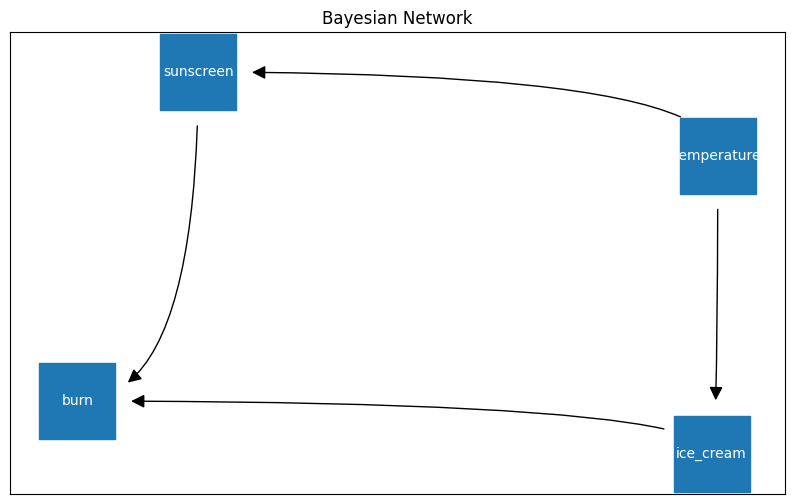


Conditional Probability Distributions (CPDs):

+----------------+-----+
| temperature(0) | 0.7 |
+----------------+-----+
| temperature(1) | 0.3 |
+----------------+-----+
+--------------+----------------+----------------+
| temperature  | temperature(0) | temperature(1) |
+--------------+----------------+----------------+
| sunscreen(0) | 0.6            | 0.2            |
+--------------+----------------+----------------+
| sunscreen(1) | 0.4            | 0.8            |
+--------------+----------------+----------------+
+--------------+----------------+----------------+
| temperature  | temperature(0) | temperature(1) |
+--------------+----------------+----------------+
| ice_cream(0) | 0.9            | 0.3            |
+--------------+----------------+----------------+
| ice_cream(1) | 0.1            | 0.7            |
+--------------+----------------+----------------+
+-----------+--------------+--------------+--------------+--------------+
| sunscreen | sunscreen(0) | sunscreen(

  0%|          | 0/2 [00:00<?, ?it/s]


Gibbs Sampling Results:
   temperature  ice_cream  sunscreen  burn
0            0          0          1     1
1            1          1          1     0
2            1          1          0     1

P(sunscreen | no temperature, burn, no ice_cream) = NORMALIZE<1, 2>
P(sunscreen | no temperature, burn, no ice_cream) = <0.3333, 0.6667>


In [2]:
# Install the required library
!pip install pgmpy

from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD
import networkx as nx
import matplotlib.pyplot as plt

# Define the model structure for a new scenario
model = BayesianModel([
    ('temperature', 'ice_cream'),
    ('temperature', 'sunscreen'),
    ('sunscreen', 'burn'),
    ('ice_cream', 'burn')
])

# Define individual CPDs for the new scenario
cpd_temp = TabularCPD('temperature', 2, [[0.7], [0.3]])

cpd_sunscreen = TabularCPD(
    'sunscreen', 2,
    [[0.6, 0.2], [0.4, 0.8]],
    evidence=['temperature'],
    evidence_card=[2]
)

cpd_ice_cream = TabularCPD(
    'ice_cream', 2,
    [[0.9, 0.3], [0.1, 0.7]],
    evidence=['temperature'],
    evidence_card=[2]
)

cpd_burn = TabularCPD(
    'burn', 2,
    [[0.95, 0.6, 0.1, 0.4], [0.05, 0.4, 0.9, 0.6]],
    evidence=['sunscreen', 'ice_cream'],
    evidence_card=[2, 2]
)

# Visualize the Bayesian Network
G = nx.DiGraph()
edges = [
    ('temperature', 'ice_cream'),
    ('temperature', 'sunscreen'),
    ('sunscreen', 'burn'),
    ('ice_cream', 'burn')
]
G.add_edges_from(edges)

plt.figure(figsize=(10, 6))
nx.draw_networkx(
    G, with_labels=True, node_size=3000, node_shape='s',
    arrowsize=20, font_size=10, font_color="white",
    connectionstyle="Angle3", pos=nx.spring_layout(G)
)
plt.title("Bayesian Network")
plt.show()

# Associate the CPDs with the network for the new scenario
model.add_cpds(cpd_temp, cpd_sunscreen, cpd_ice_cream, cpd_burn)
assert model.check_model(), "The Bayesian model is invalid!"

# Print the CPDs
print("\nConditional Probability Distributions (CPDs):\n")
for cpd in model.get_cpds():
    print(cpd)

# Direct sampling for the new scenario
p = cpd_temp.values[1] * cpd_sunscreen.values[0, 1] * cpd_ice_cream.values[1, 0] * cpd_burn.values[1, 1, 0]
print(f"\nP(burn | sunscreen, ice_cream) = {p:.4f}")

# Gibbs sampling for the new scenario
from pgmpy.sampling import GibbsSampling

n = 3  # Number of samples
gibbs_chain = GibbsSampling(model)
s = gibbs_chain.sample(size=n)
print("\nGibbs Sampling Results:")
print(s)

# Calculate probability using Gibbs sampling
c = 0
for i in range(n):
    if [s.loc[i]['sunscreen'], s.loc[i]['temperature'], s.loc[i]['burn'], s.loc[i]['ice_cream']] == [1, 0, 1, 0]:
        c += 1

print(f"\nP(sunscreen | no temperature, burn, no ice_cream) = NORMALIZE<{c}, {n-c}>")
print(f"P(sunscreen | no temperature, burn, no ice_cream) = <{c / n:.4f}, {(n - c) / n:.4f}>")
